# Charging Station Behavior
### Georgia Tech EV Charging Station transactions and miles driven
link: https://www.kaggle.com/claytonmiller/campus-electric-vehicle-charging-stations-behavior  
git https://github.com/Sheldon-Zhang/Gatech_EV_Analytics
<hr>

Contents
- [test](#Feature-Creation)
- (test)[#Feature-Creation]

# Imports
<hr>

In [3]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
# set figure size 
sns.set(rc={'figure.figsize':(21,9)})

# nan
import missingno as msno



In [4]:
# var

dict_dayofweek = { 0 : 'Monday', 1 :'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5: 'Saturday', 6 : 'Sunday'}

# Data Ingestion
<hr>

In [5]:
# reading in data - EV-Charging-Raw-Data
df = pd.read_csv('../data/ev_charging_datasets/Georga_EV_charge_behavior/EV-Charging-Raw-Data.csv')

In [6]:
df.shape

(1530, 30)

In [7]:
df.head(3)

,Label 01,Lable 02,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Postal Code,Country,Label 07,Label 08,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID
0,A,A,Georgia Tech,2/13/2015 13:30,EST,2/13/2015 14:42,EST,2/13/2015 11:46,1:12:10,1:11:50,...,30308,United States,A,A,USD,1.02,Plug Out at Vehicle,540,30102,254811.0
1,A,A,Georgia Tech,2/13/2015 12:47,EST,2/13/2015 13:45,EST,2/13/2015 10:46,0:58:39,0:58:15,...,30308,United States,A,A,USD,0.83,Customer,539,30269,323807.0
2,A,A,Georgia Tech,2/13/2015 11:50,EST,2/13/2015 13:02,EST,2/13/2015 10:04,1:11:40,1:11:24,...,30308,United States,A,A,USD,1.02,Plug Out at Vehicle,538,30253,345151.0


In [8]:
df.tail(3)

,Label 01,Lable 02,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Postal Code,Country,Label 07,Label 08,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID
1527,A,A,Georgia Tech,2/13/2015 6:35,EST,NaN,EST,NaN,9:05:05,6:38:01,...,30308,United States,A,A,NaN,0.0,NaN,791,30114,235945.0
1528,A,A,Georgia Tech,2/13/2015 15:03,EST,NaN,EST,NaN,0:35:09,0:34:44,...,30308,United States,A,A,NaN,0.0,NaN,1423857773,30345,183185.0
1529,A,A,Georgia Tech,2/13/2015 7:43,EST,NaN,EST,NaN,7:55:25,7:36:11,...,30308,United States,A,A,NaN,0.0,NaN,792,30622,217113.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Label 01                         1530 non-null   object 
 1   Lable 02                         1530 non-null   object 
 2   Org Name                         1530 non-null   object 
 3   Start Date                       1530 non-null   object 
 4   Start Time Zone                  1530 non-null   object 
 5   End Date                         1527 non-null   object 
 6   End Time Zone                    1530 non-null   object 
 7   Transaction Date (Pacific Time)  1525 non-null   object 
 8   Total Duration (hh:mm:ss)        1530 non-null   object 
 9   Charging Time (hh:mm:ss)         1530 non-null   object 
 10  Energy (kWh)                     1530 non-null   float64
 11  GHG Savings (kg)                 1530 non-null   float64
 12  Gasoline Savings (ga

In [10]:
df.head(1).T

,0
Label 01,A
Lable 02,A
Org Name,Georgia Tech
Start Date,2/13/2015 13:30
Start Time Zone,EST
End Date,2/13/2015 14:42
End Time Zone,EST
Transaction Date (Pacific Time),2/13/2015 11:46
Total Duration (hh:mm:ss),1:12:10
Charging Time (hh:mm:ss),1:11:50


In [11]:
df.columns



Index(['Label 01', 'Lable 02', 'Org Name', 'Start Date', 'Start Time Zone',
       'End Date', 'End Time Zone', 'Transaction Date (Pacific Time)',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'Label 03', 'Label 04', 'Label 05',
       'Label 06', 'Postal Code', 'Country', 'Label 07', 'Label 08',
       'Currency', 'Fee', 'Ended By', 'Plug In Event Id', 'Driver Postal Code',
       'User ID'],
      dtype='object')

<hr>

### Reading in other file 

In [12]:
!ls ../data/ev_charging_datasets/Georga_EV_charge_behavior

Campus EV Charging Behavior Study.pdf Driving_Distance.xlsx
DataAnalytics.m                       EV-Charging-Raw-Data.csv
Driving_Distance.csv                  README.md


In [13]:
# data table with distences from home zip code to charging zip code
df2 = pd.read_csv('../data/ev_charging_datasets/Georga_EV_charge_behavior/Driving_Distance.csv')

In [14]:
df2.shape

(84, 3)

In [15]:
df2.head()

,From,To,km
0,30308,28207,362.076
1,30308,30002,10.766
2,30308,30004,42.394
3,30308,30005,38.345
4,30308,30009,34.898


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   From    84 non-null     int64  
 1   To      84 non-null     int64  
 2   km      84 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


<br>

# Nan Inspection 
<hr>

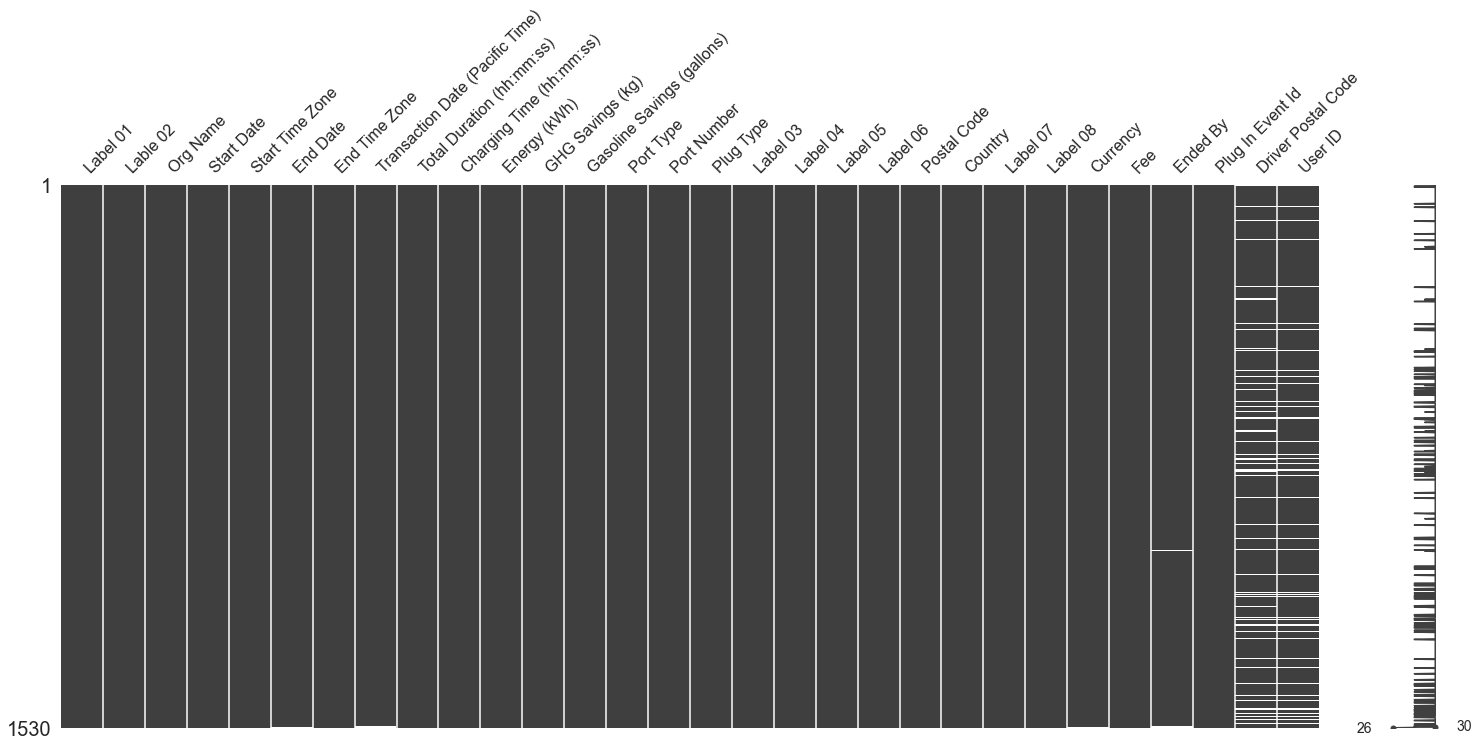

In [17]:
msno.matrix(df)

In [ ]:
msno.bar(df)

# Feature Creation 
<hr>

In [18]:
# A slice of the data frame 
#    - 

df = df[['Start Date',
'Total Duration (hh:mm:ss)',
'Charging Time (hh:mm:ss)',
'GHG Savings (kg)',
'Energy (kWh)',
'Port Type',
'Plug Type',
'Gasoline Savings (gallons)',
'Postal Code',
'Ended By',
'Fee',
'Driver Postal Code',
'User ID']]

df.head(3)

,Start Date,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),GHG Savings (kg),Energy (kWh),Port Type,Plug Type,Gasoline Savings (gallons),Postal Code,Ended By,Fee,Driver Postal Code,User ID
0,2/13/2015 13:30,1:12:10,1:11:50,2.625,6.249,Level 2,J1772,0.784,30308,Plug Out at Vehicle,1.02,30102,254811.0
1,2/13/2015 12:47,0:58:39,0:58:15,1.828,4.352,Level 2,J1772,0.546,30308,Customer,0.83,30269,323807.0
2,2/13/2015 11:50,1:11:40,1:11:24,1.823,4.341,Level 2,J1772,0.545,30308,Plug Out at Vehicle,1.02,30253,345151.0


In [19]:
# set start time to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [20]:
# create a column with day of the week 
df['day_of_week'] = df['Start Date'].dt.dayofweek
# creats a column with week
df['week'] = df['Start Date'].dt.week
# convert int to sting of days of week, monday, tuesday, wednesday ... 
df.replace({'day_of_week' : dict_dayofweek}, inplace = True)

# creats a column with month
df['month'] = df['Start Date'].dt.month

# creats a column with hour
df['hour'] = df['Start Date'].dt.hour
# creates a varable to count numer of events that day
df['count_event'] = 1

<br>

#### DateTime Manipulaton

In [21]:
# DateTime Manipulation 
#       - set Time to index
df.set_index('Start Date', inplace = True)
df.sort_index(inplace = True)

In [22]:
# Create dataframe for visualization

# duplicate df
df_graph = df.copy()
# create sum per WEEK
df_graph = df_graph.resample('w').sum()

In [23]:
""""
playing with time in date time to graph it 

"""


##   df['date'] = df.index.dt.date
##   df['time'] = pd.to_datetime('timestamp')

#    df['time'] = 
#    df.index.strftime("%H.%M")



'"\nplaying with time in date time to graph it \n\n'

<br>

## Quick Exploration
<hr>
<br>

#### Dates

In [41]:
df.index.min()

Timestamp('2014-01-03 16:51:00')

In [42]:
df.index.max()

Timestamp('2015-02-13 15:03:00')

In [43]:
df.index.max() - df.index.min()

Timedelta('405 days 22:12:00')

        Dates 1/03/2014 - 2/13/2015
        405 days in total

#### Port Type

In [24]:
df['Port Type'].value_counts()

Level 2    1530
Name: Port Type, dtype: int64

                All ports are Level 2

#### Plug Type

In [25]:
df['Plug Type'].value_counts()

J1772    1530
Name: Plug Type, dtype: int64

                All plugs are J1772

#### Ended By

In [26]:
df['Ended By'].value_counts()

Plug Out at Vehicle             1088
Customer                         312
CPS Server                        64
Timeout                           58
Plug Removed While Rebooting       1
Name: Ended By, dtype: int64

<br>

#### GHG Savings

In [27]:
df['GHG Savings (kg)'].describe()

count    1530.000000
mean        3.906703
std         2.758232
min         0.000000
25%         2.265250
50%         3.751000
75%         5.198750
max        35.862000
Name: GHG Savings (kg), dtype: float64

<br>

#### Postal code 

In [28]:
df['Postal Code'].value_counts()

30308    1530
Name: Postal Code, dtype: int64

                All are postal code 30308

#### Driver Postal Codes

Text(0.5, 1.0, 'NUmber of events per Driver Postal Code')

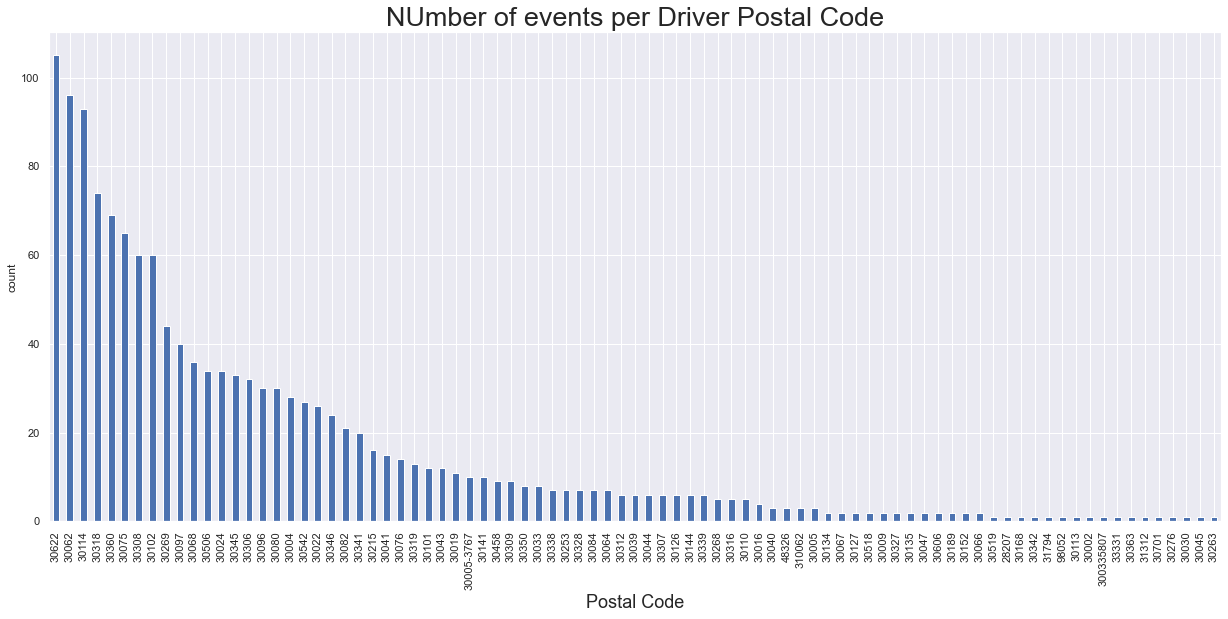

In [29]:
df['Driver Postal Code'].value_counts().plot(kind='bar', figsize = (21,9))
# Axis labels
plt.xlabel("Postal Code", fontsize = 18)
plt.ylabel("count", fontsize = 12)
plt.title('NUmber of events per Driver Postal Code', fontsize = 27)

28.666666666666668


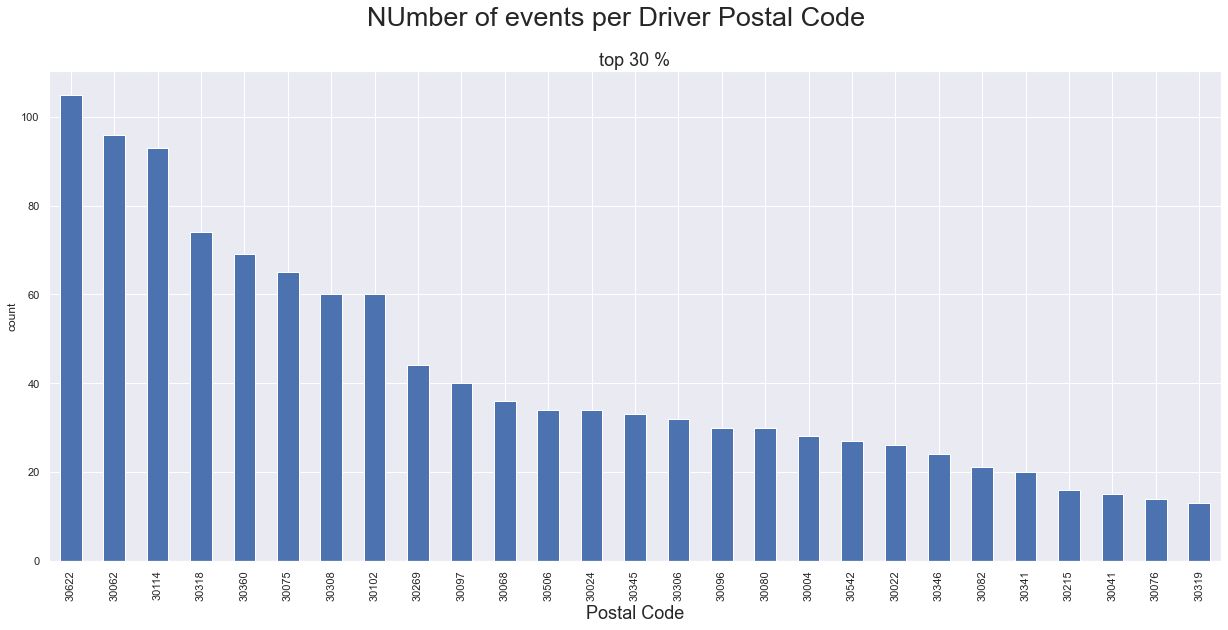

In [30]:
# Top 1/3 of Driver Postal Code 

print(len(pd.unique(df['Driver Postal Code'])) / 3 )

# Variable - index zip code , [1] counts
top_third_driverPostalCode = df['Driver Postal Code'].value_counts().sort_values(axis=0, ascending = False).head(27)

# Graph 
df['Driver Postal Code'].value_counts().sort_values(axis=0, ascending = False).head(27).plot(kind='bar', figsize = (21,9))

plt.xlabel("Postal Code", fontsize = 18)
plt.ylabel("count", fontsize = 12)
plt.suptitle('NUmber of events per Driver Postal Code', fontsize = 27);
plt.title('top 30 %', fontsize = 18);

In [31]:
# Cleans up 'Driver Postal Code' from NANs and other random 

Driver_Postal_Code = []

for x in df['Driver Postal Code'].dropna():
    if len(x) == 5:
        Driver_Postal_Code.append(int(x))

# displays count of each zip code 
zipcode, count = np.unique(Driver_Postal_Code,return_counts=True) 

tempData = { 'zipcode': zipcode, 'count': count}
df_driverZip = pd.DataFrame(tempData)
df_driverZip = df_driverZip.sort_values(by = 'count', ascending= False).reset_index(drop = True)

<br>

#### Energy per Week

''

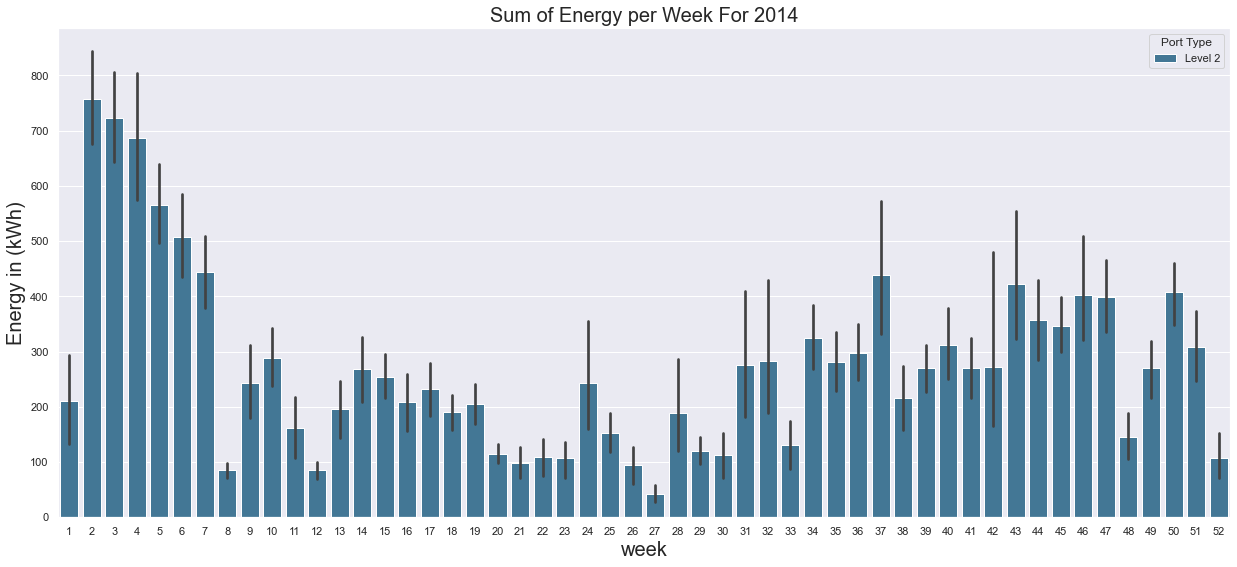

In [32]:
# Bar plot - sum of energy per week

sns.set(rc={'figure.figsize':(21,9),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

ax = sns.barplot(data = df, x = 'week', y = 'Energy (kWh)', 
       hue = 'Port Type',estimator=np.sum, palette = 'mako')

ax.set(xlabel="week",
       ylabel="Energy in (kWh)",
       title="Sum of Energy per Week For 2014",
       )
;


''

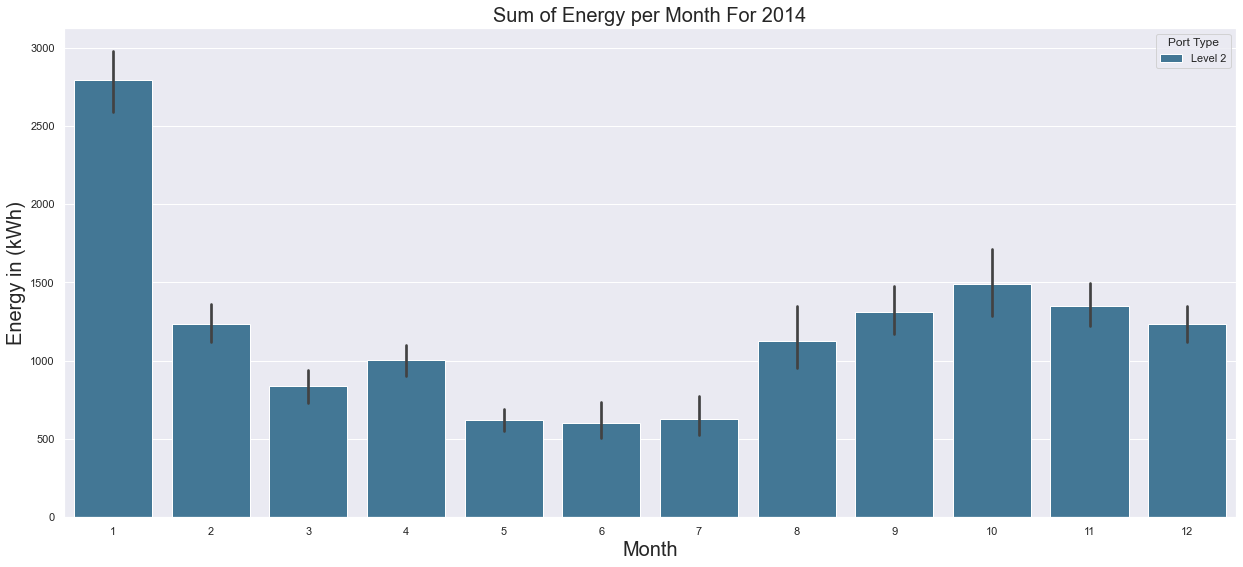

In [33]:
# Bar plot - sum of energy per month

sns.set(rc={'figure.figsize':(21,9),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

ax = sns.barplot(data = df, x = 'month', y = 'Energy (kWh)', 
       hue = 'Port Type',estimator=np.sum, palette = 'mako')

ax.set(xlabel="Month",
       ylabel="Energy in (kWh)",
       title="Sum of Energy per Month For 2014",
       )
;

''

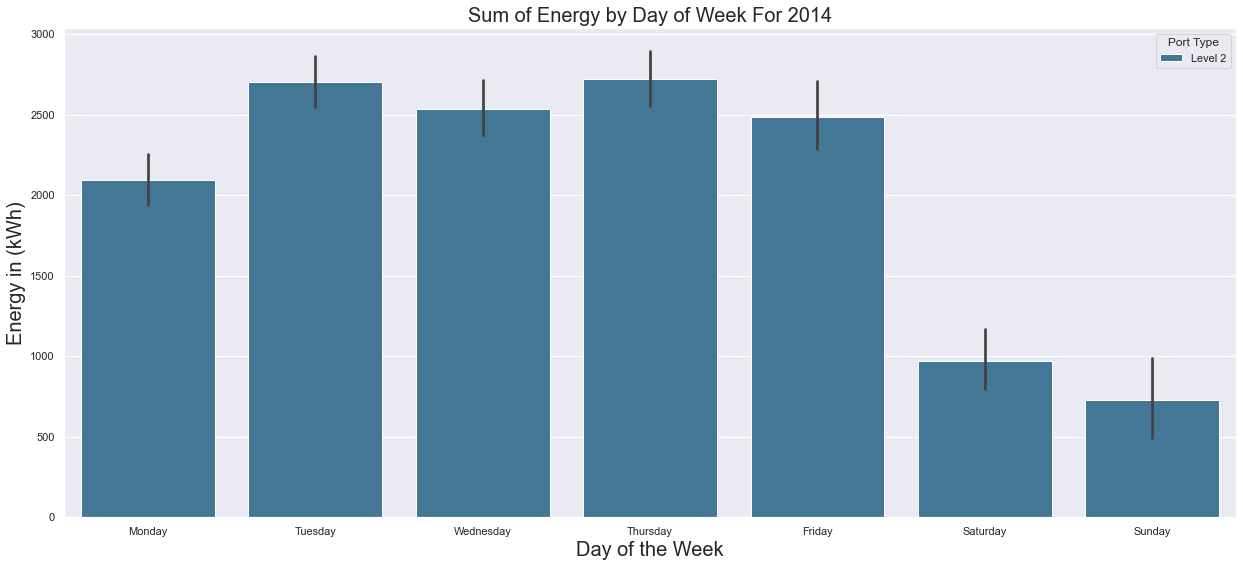

In [34]:
# Bar plot - sum of energy by day of week

sns.set(rc={'figure.figsize':(21,9),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

ax = sns.barplot(data = df, x = 'day_of_week', y = 'Energy (kWh)', 
       hue = 'Port Type',estimator=np.sum, palette = 'mako',
       order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

ax.set(xlabel="Day of the Week",
       ylabel="Energy in (kWh)",
       title="Sum of Energy by Day of Week For 2014",
       )
;

''

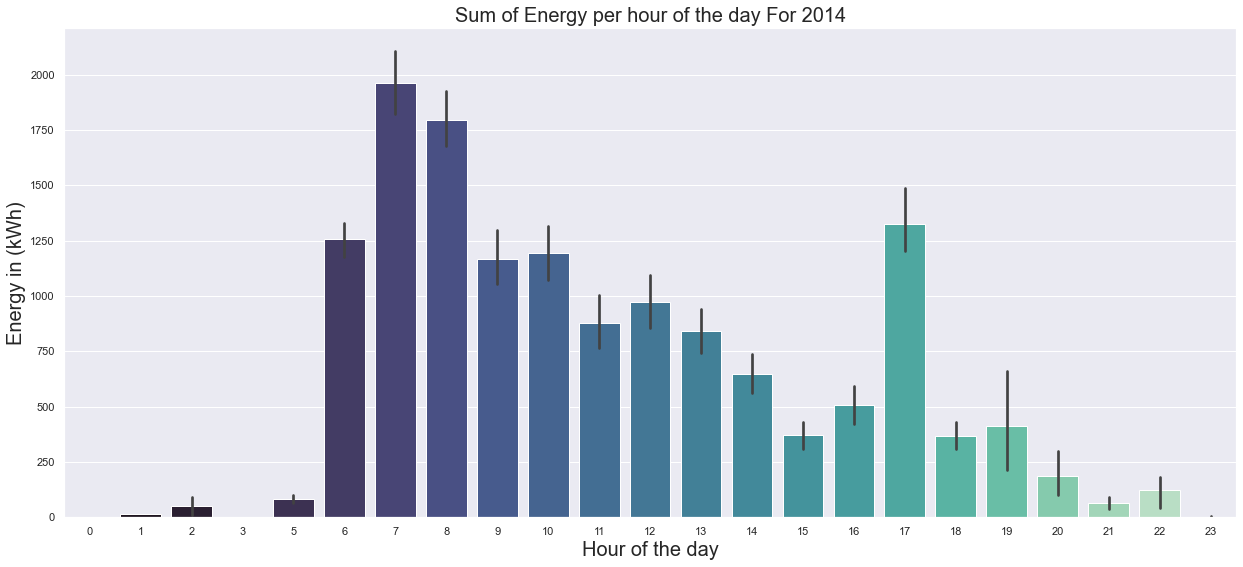

In [35]:
# Bar plot - sum of energy by hour of the day

sns.set(rc={'figure.figsize':(21,9),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

ax = sns.barplot(data = df, x = 'hour', y = 'Energy (kWh)', 
       estimator=np.sum, palette = 'mako'
              )

ax.set(xlabel="Hour of the day",
       ylabel="Energy in (kWh)",
       title="Sum of Energy per hour of the day For 2014",
       )
;

''

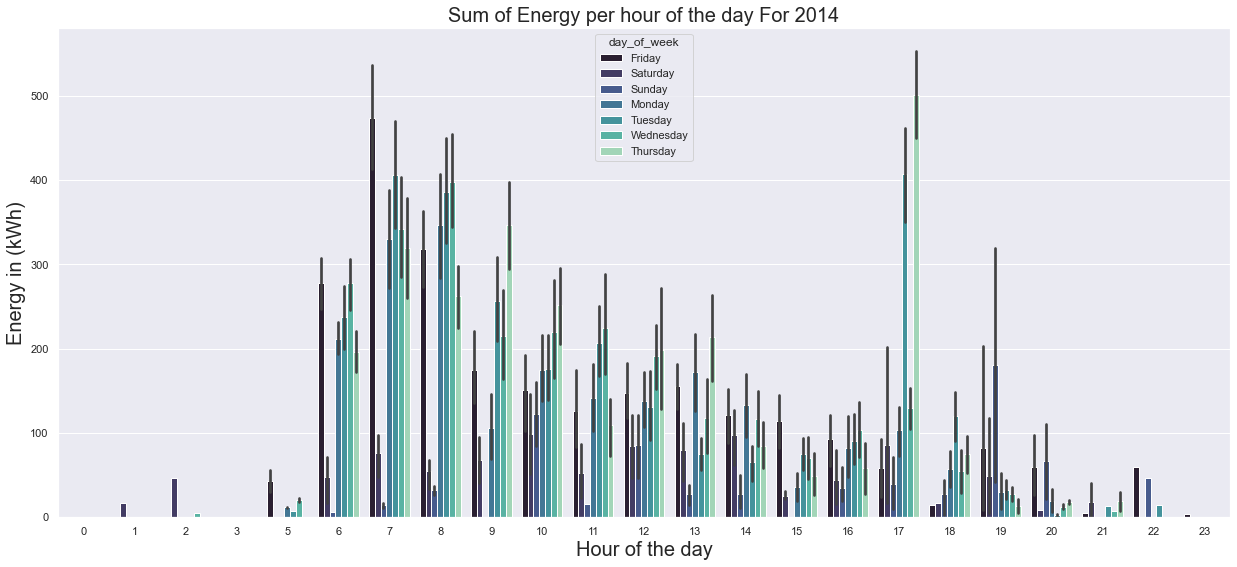

In [36]:
# Bar plot - sum of energy by hour of the day

sns.set(rc={'figure.figsize':(21,9),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

ax = sns.barplot(data = df, x = 'hour', y = 'Energy (kWh)', 
       hue = 'day_of_week',estimator=np.sum, palette = 'mako'
              )

ax.set(xlabel="Hour of the day",
       ylabel="Energy in (kWh)",
       title="Sum of Energy per hour of the day For 2014",
       )
;

''

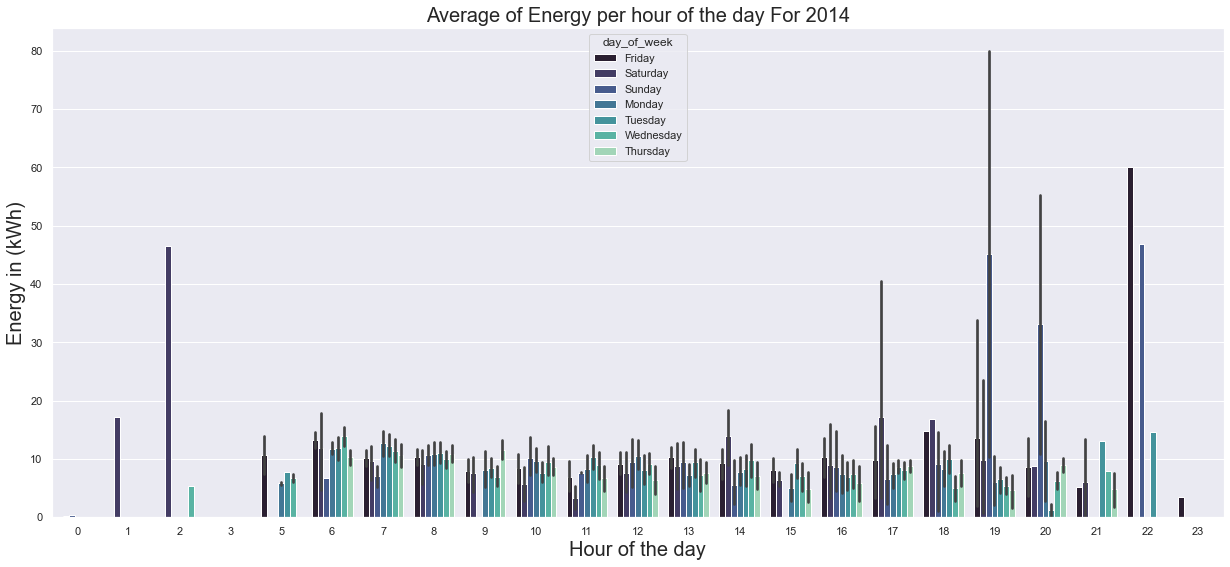

In [37]:
# Bar plot - Average of energy by hour of the day

sns.set(rc={'figure.figsize':(21,9),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

ax = sns.barplot(data = df, x = 'hour', y = 'Energy (kWh)', 
       hue = 'day_of_week',estimator=np.mean, palette = 'mako')

ax.set(xlabel="Hour of the day",
       ylabel="Energy in (kWh)",
       title="Average of Energy per hour of the day For 2014",
       )
;

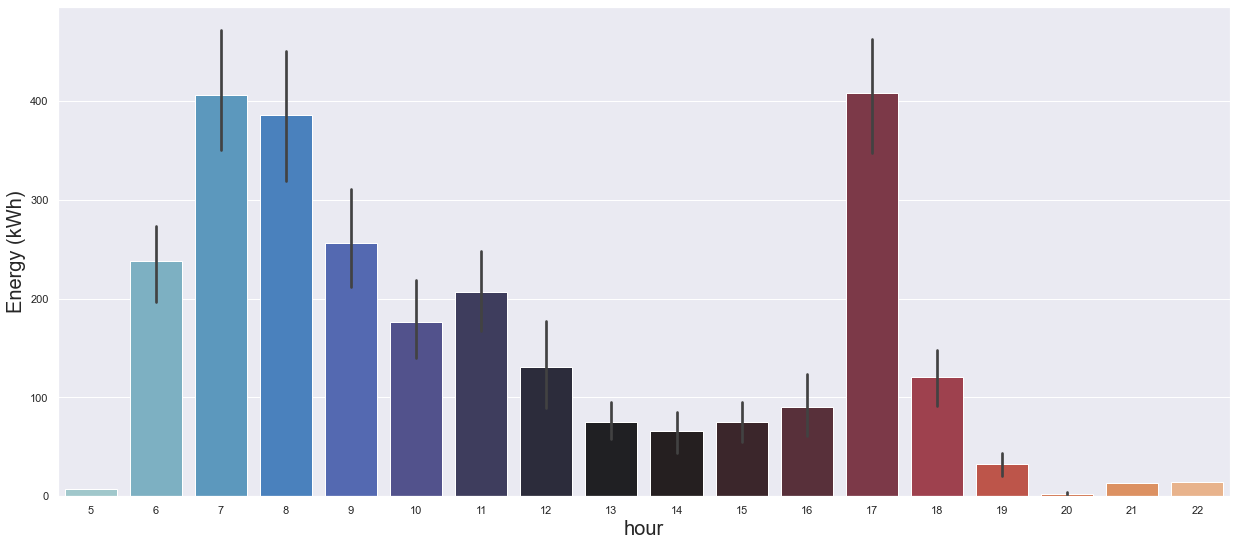

In [38]:
# It would be nice to show all days of the week in an animation with the abilty to right click 


sns.barplot(
    data = df[ df['day_of_week'] == 'Tuesday' ],
    x = 'hour',
    y = 'Energy (kWh)',
    estimator = np.sum,
    palette = "icefire"
    );

create 3d visualization
end is sum 


#### Energy Usage

ConversionError: Failed to convert value(s) to axis units: '2014-01-01'

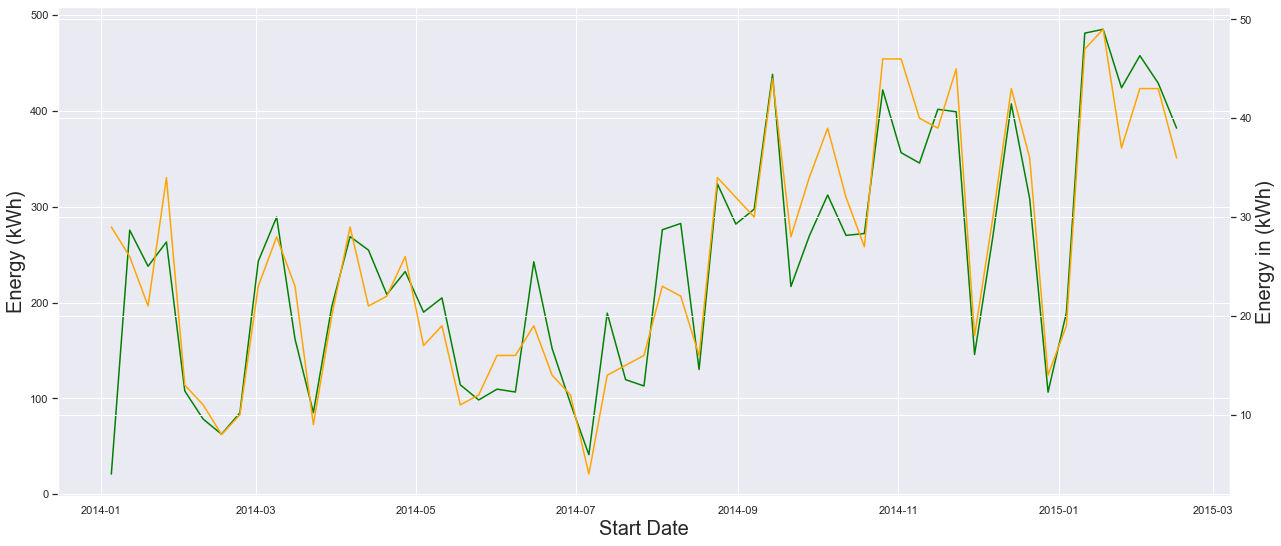

In [39]:
# Sum of Energy per Day For 2014

sns.set(rc={'figure.figsize':(21,9),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})


# figure 

ax = sns.lineplot(x = df_graph.index, y = df_graph['Energy (kWh)'], color = 'green'
        )
ax2 = plt.twinx()
ax = sns.lineplot(x = df_graph.index, y = df_graph['count_event'], ax = ax2, color = 'orange')

ax.set(xlabel="Date",
       ylabel="Energy in (kWh)",
       title="Sum of Energy per Week For 2014",
       xlim=["2014-01-01", "2014-12-31"])
       
ax2.set_ylabel("Charging Events",color="orange",fontsize=18)

# have before DateFormatter       
ax.set_xticklabels(df_graph.index, rotation=45, horizontalalignment='right')
# date format
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)

# tick once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

## 
# axs.set_ylabel('mylabel',size=6)
#fig, ax = plt.subplots(figsize = (21,9))

;

In [ ]:
# charging per month 
# sum of energy
# show varables 

''

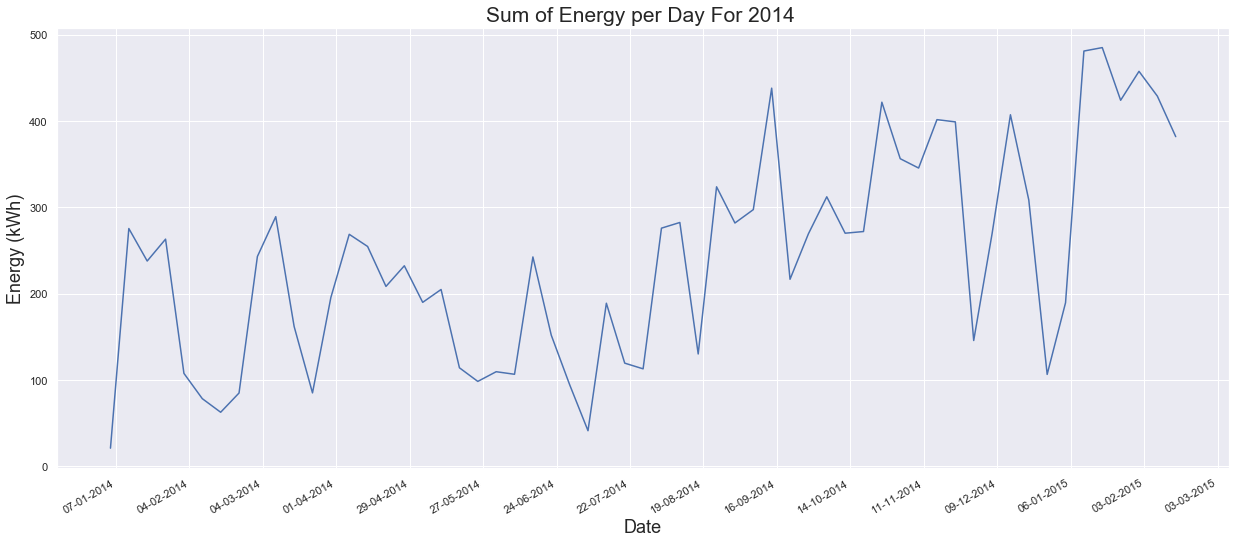

In [ ]:
# Sum of Energy per Day For 2014



sns.lineplot(
    x = df_graph.index, y = df_graph['Energy (kWh)']

);
# Axis labels
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Energy (kWh)", fontsize = 18)
plt.title('Sum of Energy per Day For 2014 ', fontsize = 21)

plt.gcf().autofmt_xdate()

date_format = mdates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    # ax.xaxis.set_minor_locator(mdates.DayLocator())
;

## Questions 
<hr>

In [ ]:
"""
Date can be used to say when and how much load is put on the Grid
Q ?what is the best way to show time on a graph?
Q ?Show amount of energy used per time 
Q ?is there a normal time period when people charge and how much do they charge?
Q ? do users charge normal at the same time?  what is the propability they keep to their pattern? 

        Math to show consitensy 

Q Is there more charge from a particular user zip code?
Q what if we log that charge that it is not taking place at their home charging
Q most popular 'driver postal code'
Q 

basic questions

averge fee 
averge charging time
driver postal code. 

most popular Port type
avg charing time & energy === per port type 

"""

"""
Questons about the data 

how are they computing GHG savings in (KG)
how are they computing Gasoline savings (gallons)

"""

'\nQuestons about the data \n\nhow are they computing GHG savings in (KG)\nhow are they computing Gasoline savings (gallons)\n\n'